# Homework1 - Classifiers Based on Bayes Decision Theory
### by Mehdi Lotfipour

In [1]:
import numpy as np
from math import floor
from math import ceil
import matplotlib.pyplot as plt

In this part three classifiers are defined: Euclidean distance classifier, Mahalanobis distance classifier and Bayesian classifier. Bayesian classifier is the general solution, but Euclidean distance classifier and Mahalanobis distance classifier have some assumptions to make the decision more simple. Euclidean distance classifier uses Euclidean distance from mean as a discriminant function and select the minimum. It uses only the mean vectors. Covariance matrices and priors are not used in this method. In Mahalanobis distance classifier, only one covariance matrix is used to get the Mahalanobis distance for discriminant function.

Euclidean distance: $(x - \mu)^{T} (x - \mu)$

Mahalanobis distance: $(x - \mu)^{T} \Sigma ^{-1} (x - \mu)$

It uses sigma, but just one as a representer for all classes. Like Euclidean classifier no priors are used for this classifier. In Bayesian classifier, discriminant functions are probabilty of each class as a true label conditioned on observing the dataset. This probability is calculated based on Bayes rule and p(x|Wj) can be calculated by normal distribution formula:

$$p(W_{j}|x) = \frac{p(x|W_{j}) * P_{j}}{P(x)}$$

$$p(x|W_{j}) = \frac{1}{(2\pi) ^{1/2} |\Sigma_{i}|} e ^{((x - \mu)^{T} \Sigma_{i} ^{-1} (x - \mu))}$$

P(x) is constant and can be eliminated. This method is optimal in general case and uses priors beside the distribution parameters.

$$g_{i}(x) = p(x|W_{j}) * P_{j}$$

In [2]:
#defining Euclidean distance classifier
def euclidean_classifier(X, mu):
    #X: a (N x 3) matrix that is dataset
    #mu: a list containig three mean vector
    
    #keeping Euclidean distance of each class
    eucli_distance = np.zeros([X.shape[0], 3])
    #for each class
    for i in range(3):
        dif_x_mu = X - mu[i]
        eucli_distance[:,i] = np.einsum('ij, ij -> i', dif_x_mu, dif_x_mu)
    #prediction is based on maximum Euclidean distance
    prediction = np.argmin(eucli_distance, axis=1)
    return prediction

#defining Mahalanobis distance classifier
def mahalanobis_classifier(X, mu, sigma):
    #X: a (N x 3) matrix that is dataset
    #mu: a list containig three mean vector
    #sigma: a (2 x 2) matrix that is distribution covariance
    
    #keeping Mahalanobis distance of each class
    mahal_distance = np.zeros([X.shape[0], 3])
    #for each class
    for i in range(3):
        dif_x_mu = X - mu[i]
        temp_var = np.matmul(np.linalg.inv(sigma), dif_x_mu.T)
        mahal_distance[:,i] = np.einsum('ij, ij -> i', dif_x_mu, temp_var.T)
    #prediction is based on maximum Mahalanobis distance
    prediction = np.argmin(mahal_distance, axis=1)
    return prediction

#defining Bayesian classifier
def bayesian_classifier(X, mu, sigma, prior):
    #X: a (N x 3) matrix that is dataset
    #mu: a list containig three mean vector
    #sigma: a list containing three class covariance
    #prior: a list containing three prior probability of classes
    
    #keeping likelihood of each class for all data points
    likelihood_X = np.zeros([X.shape[0], 3])
    #for each class
    for i in range(3):
        dif_x_mu = X - mu[i]
        result = np.matmul(np.linalg.inv(sigma[i]), dif_x_mu.T)
        result = np.einsum('ij, ij -> i', dif_x_mu, result.T)
        constant = 1 / (np.pi * np.linalg.det(sigma[i]) ** 0.5)
        likelihood_X[:,i] = constant * np.exp(-0.5 * result)
    #p(Wj|x) = p(w|Wj) * Pj
    p_w_x = likelihood_X * prior
    #prediction is based on maximum of p(Wj|x)
    prediction = np.argmax(p_w_x, axis=1)
    #returning prediction vector
    return prediction

In this part the structure of dataset is made. 1000 data points of three classes is needed. Each class has a prior probability that sums up to one and has its own center vector and covariance matrix. Center vectors are kept in a list called "mu" and covariance matrices are kept in a list called "sigma". Then three minor dataset are generated based on normal distribution. Minor datasets have number of datapoints with respect to priors probabilty (rows) and three feature (columns) that one of them is class label. Distribution of each minor dataset is normal with respect to its mean and covariance. Then all minor datasets are concatenated to form a single dataset called "dataset". After that three different classifier are applied on dataset and prediction with respect to each classifier is produced. For every prediction, error rate is calculated. Finally the original dataset and three different decision regions with respect to each classifier are plotted. Original dataset plot shows how the generated data looks like. Color of points represent the class and locations represent two features.

## Q 2.2

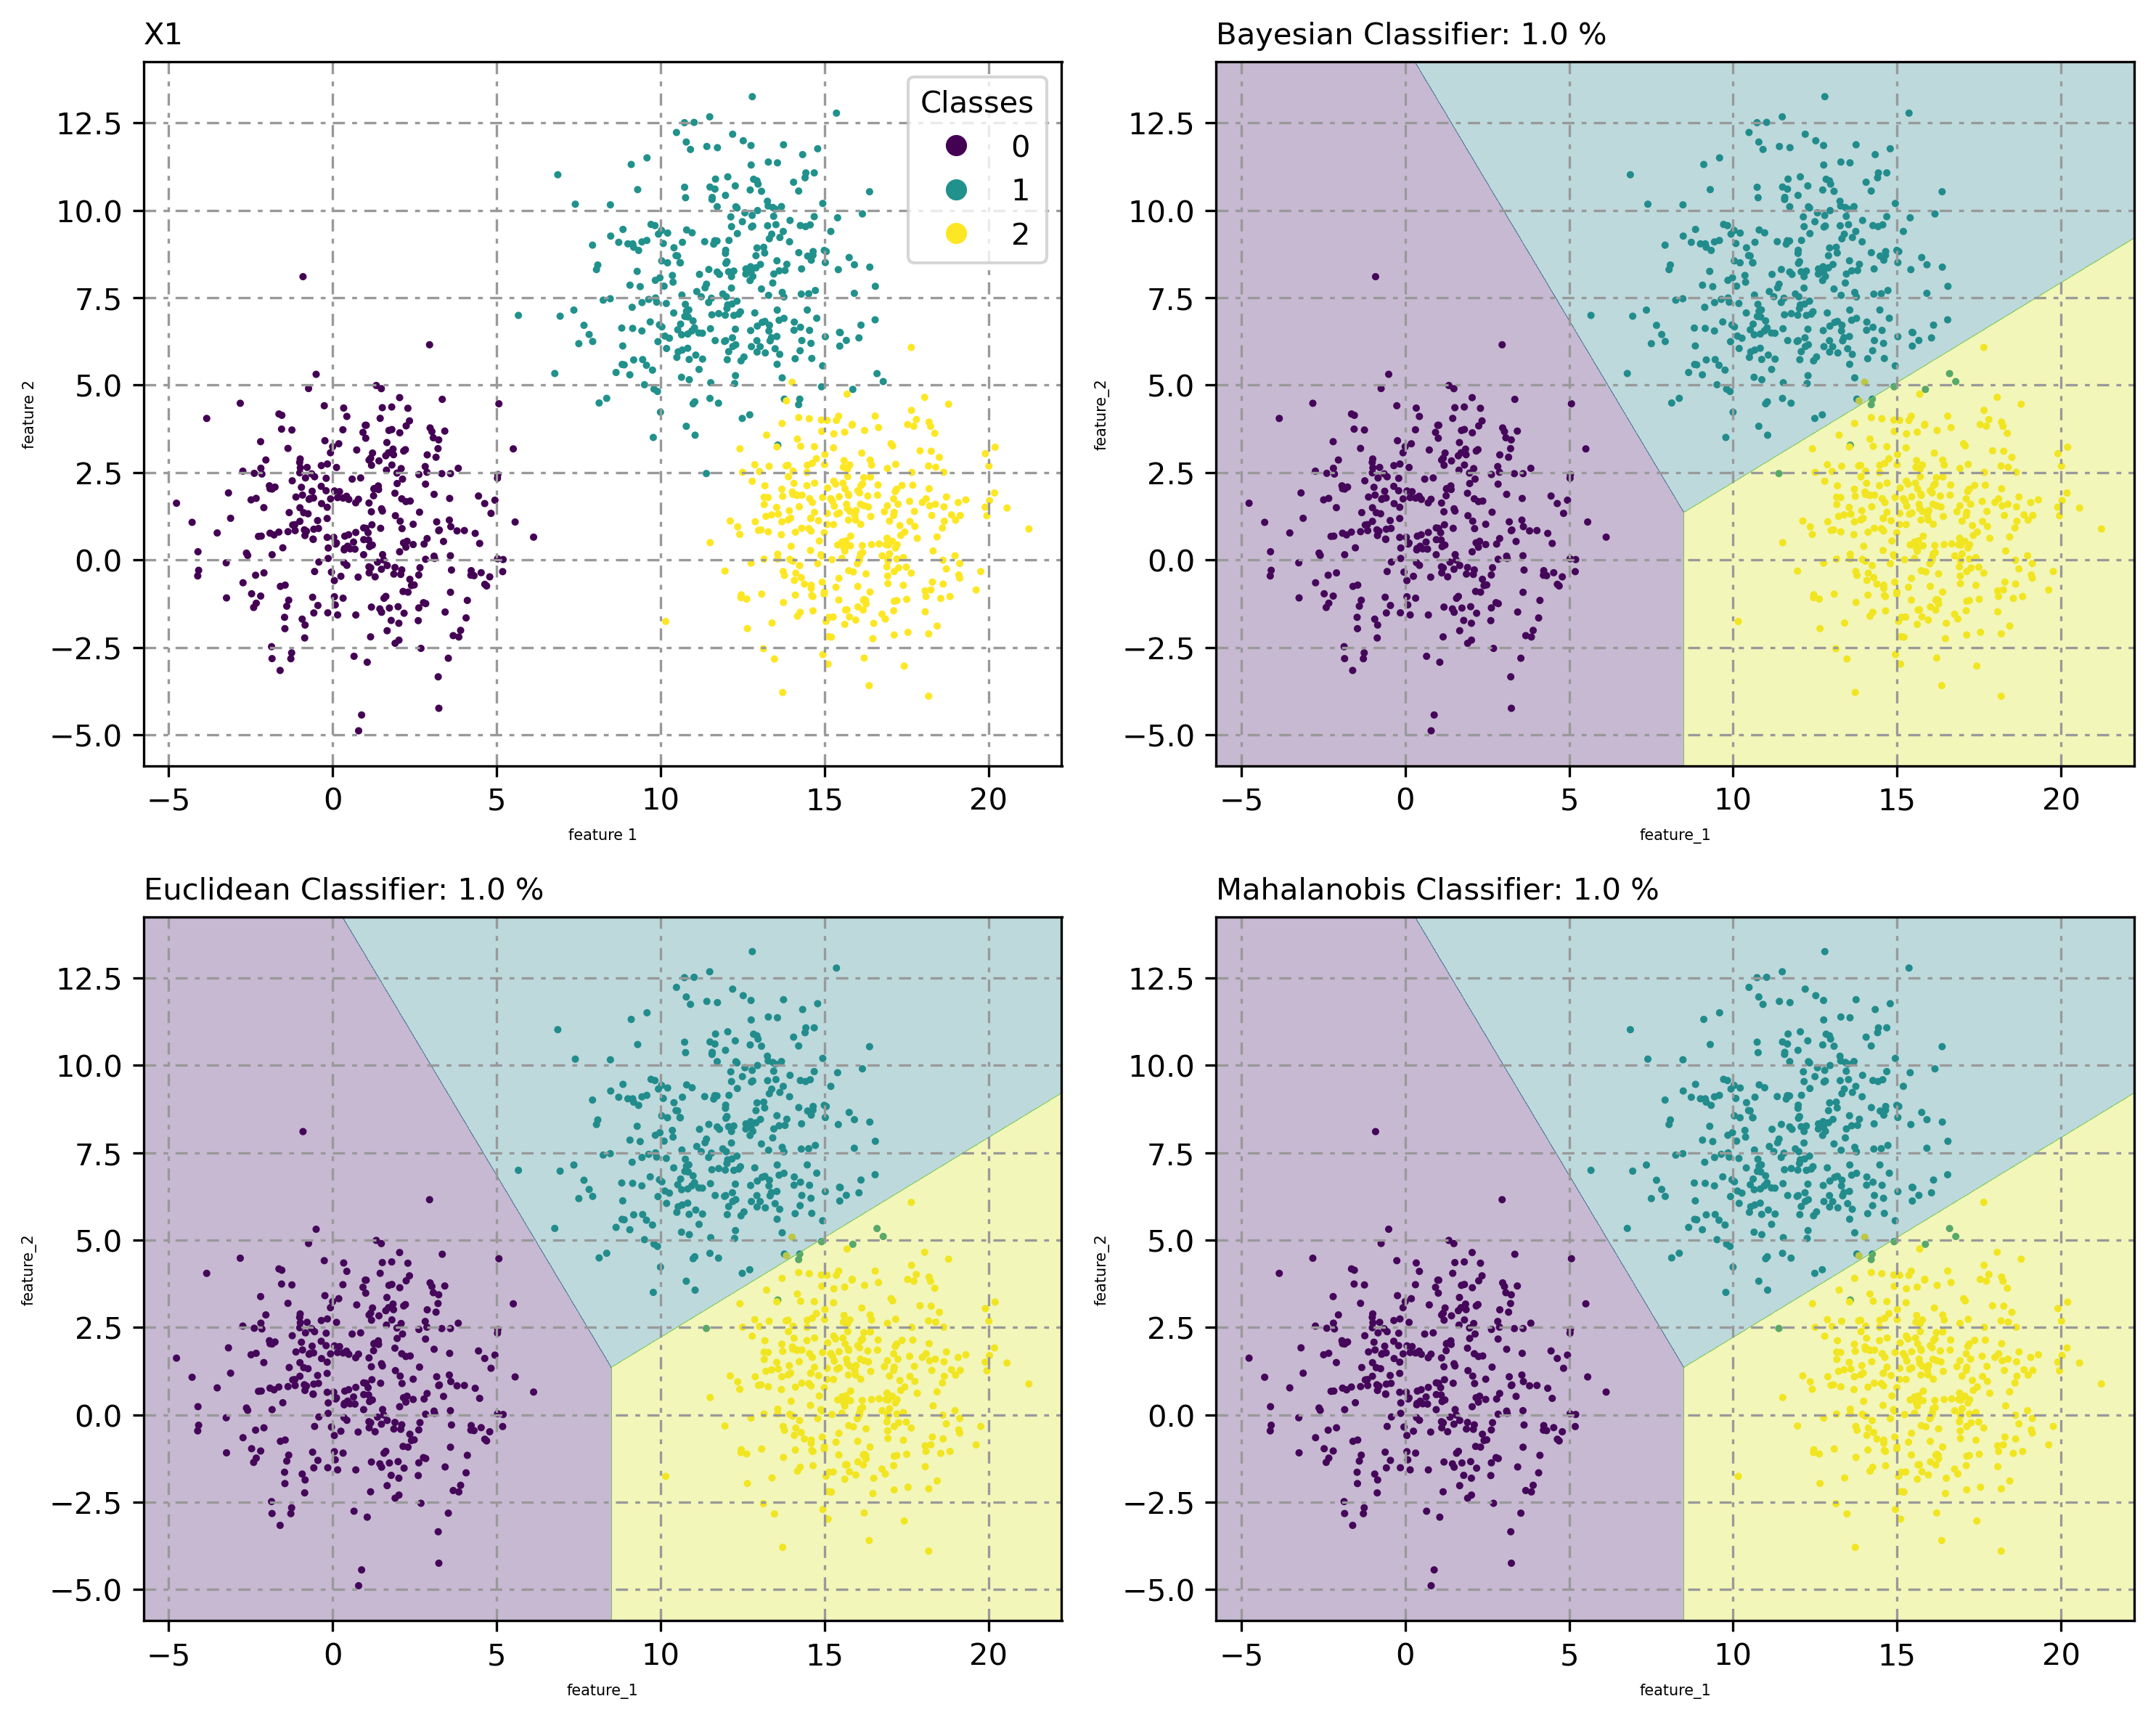

In [3]:
#parameters of dataset
#number of data point: N
#probability of each class: prior
N = 1000
prior = [1/3, 1/3, 1/3]
#means: m_i
m_0 = np.array([1, 1])
m_1 = np.array([12, 8])
m_2 = np.array([16, 1])
#covariances: s_i
s_0 = np.array([[4, 0], [0, 4]])
s_1 = np.array([[4, 0], [0, 4]])
s_2 = np.array([[4, 0], [0, 4]])
#keep them in a list
mu = [m_0, m_1, m_2]
sigma = [s_0, s_1, s_2]

#generating dataset
#number of samples in each class
class_count = [floor(N * prior[0]), floor(N * prior[1]), ceil(N * prior[2])]
#keep generated data of each class
x = []
for i in range(3):
    class_size = [class_count[i], 3]
    z = np.zeros(class_size)
    #setting label
    z[:, -1] = i
    #generating random data
    #from multi variate normal distribution
    #based on mean of i'th class
    #and covariance of i'th class
    z[:, :-1] = np.random.multivariate_normal(mu[i], sigma[i], size= class_size[0])
    x.append(z)
#concatenating all to one dataset
dataset = np.concatenate((x[0], x[1], x[2]), axis= 0)

#Error rate
#Bayesian error
prediction = bayesian_classifier(dataset[:, :-1], mu, sigma, prior)
error_bayesian = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)
#Euclidean error
prediction = euclidean_classifier(dataset[:, :-1], mu)
error_euclidean = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)
#Mahalanobis error
prediction = mahalanobis_classifier(dataset[:, :-1], mu, sigma[0])
error_mahalanobis = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)

#preparing mesh for showing boundries
#making mesh
x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_data = np.c_[xx.ravel(), yy.ravel()]
#applying classifiers on mesh grid
region_bayesian = bayesian_classifier(grid_data, mu, sigma, prior).reshape(xx.shape)
region_euclidean = euclidean_classifier(grid_data, mu).reshape(xx.shape)
region_mahalanobis = mahalanobis_classifier(grid_data, mu, sigma[0]).reshape(xx.shape)



#plotting
#plot structure
fig, ax = plt.subplots(2, 2, dpi= 300, figsize= (10, 8))

#original dataset
#data points
scatter = ax[0, 0].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
#details
ax[0, 0].set_xlim([x_min, x_max])
ax[0, 0].set_ylim([y_min, y_max])
ax[0, 0].set_title('X1', fontsize= 10, loc= 'left')
ax[0, 0].set_xlabel('feature 1', fontsize= 5)
ax[0, 0].set_ylabel('feature 2', fontsize= 5)
ax[0, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax[0, 0].legend(*scatter.legend_elements(), loc="best", title="Classes")

#Bayesian classifier
#data points and boundries
ax[0, 1].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[0, 1].contourf(xx, yy, region_bayesian, alpha=0.3)
#details
ax[0, 1].set_xlim([x_min, x_max])
ax[0, 1].set_ylim([y_min, y_max])
ax[0, 1].set_title(f'Bayesian Classifier: {error_bayesian} %', fontsize= 10, loc= 'left')
ax[0, 1].set_xlabel('feature_1', fontsize= 5)
ax[0, 1].set_ylabel('feature_2', fontsize= 5)
ax[0, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))

#Euclidean classifier
#data points and boundries
ax[1, 0].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[1, 0].contourf(xx, yy, region_euclidean, alpha=0.3)
#details
ax[1, 0].set_xlim([x_min, x_max])
ax[1, 0].set_ylim([y_min, y_max])
ax[1, 0].set_title(f'Euclidean Classifier: {error_euclidean} %', fontsize= 10, loc= 'left')
ax[1, 0].set_xlabel('feature_1', fontsize= 5)
ax[1, 0].set_ylabel('feature_2', fontsize= 5)
ax[1, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))

#Mahalanobis classifier
#data points and boundries
ax[1, 1].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[1, 1].contourf(xx, yy, region_mahalanobis, alpha=0.3)
#details
ax[1, 1].set_xlim([x_min, x_max])
ax[1, 1].set_ylim([y_min, y_max])
ax[1, 1].set_title(f'Mahalanobis Classifier: {error_mahalanobis} %', fontsize= 10, loc= 'left')
ax[1, 1].set_xlabel('feature_1', fontsize= 5)
ax[1, 1].set_ylabel('feature_2', fontsize= 5)
ax[1, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
plt.tight_layout()

## Q 2.3

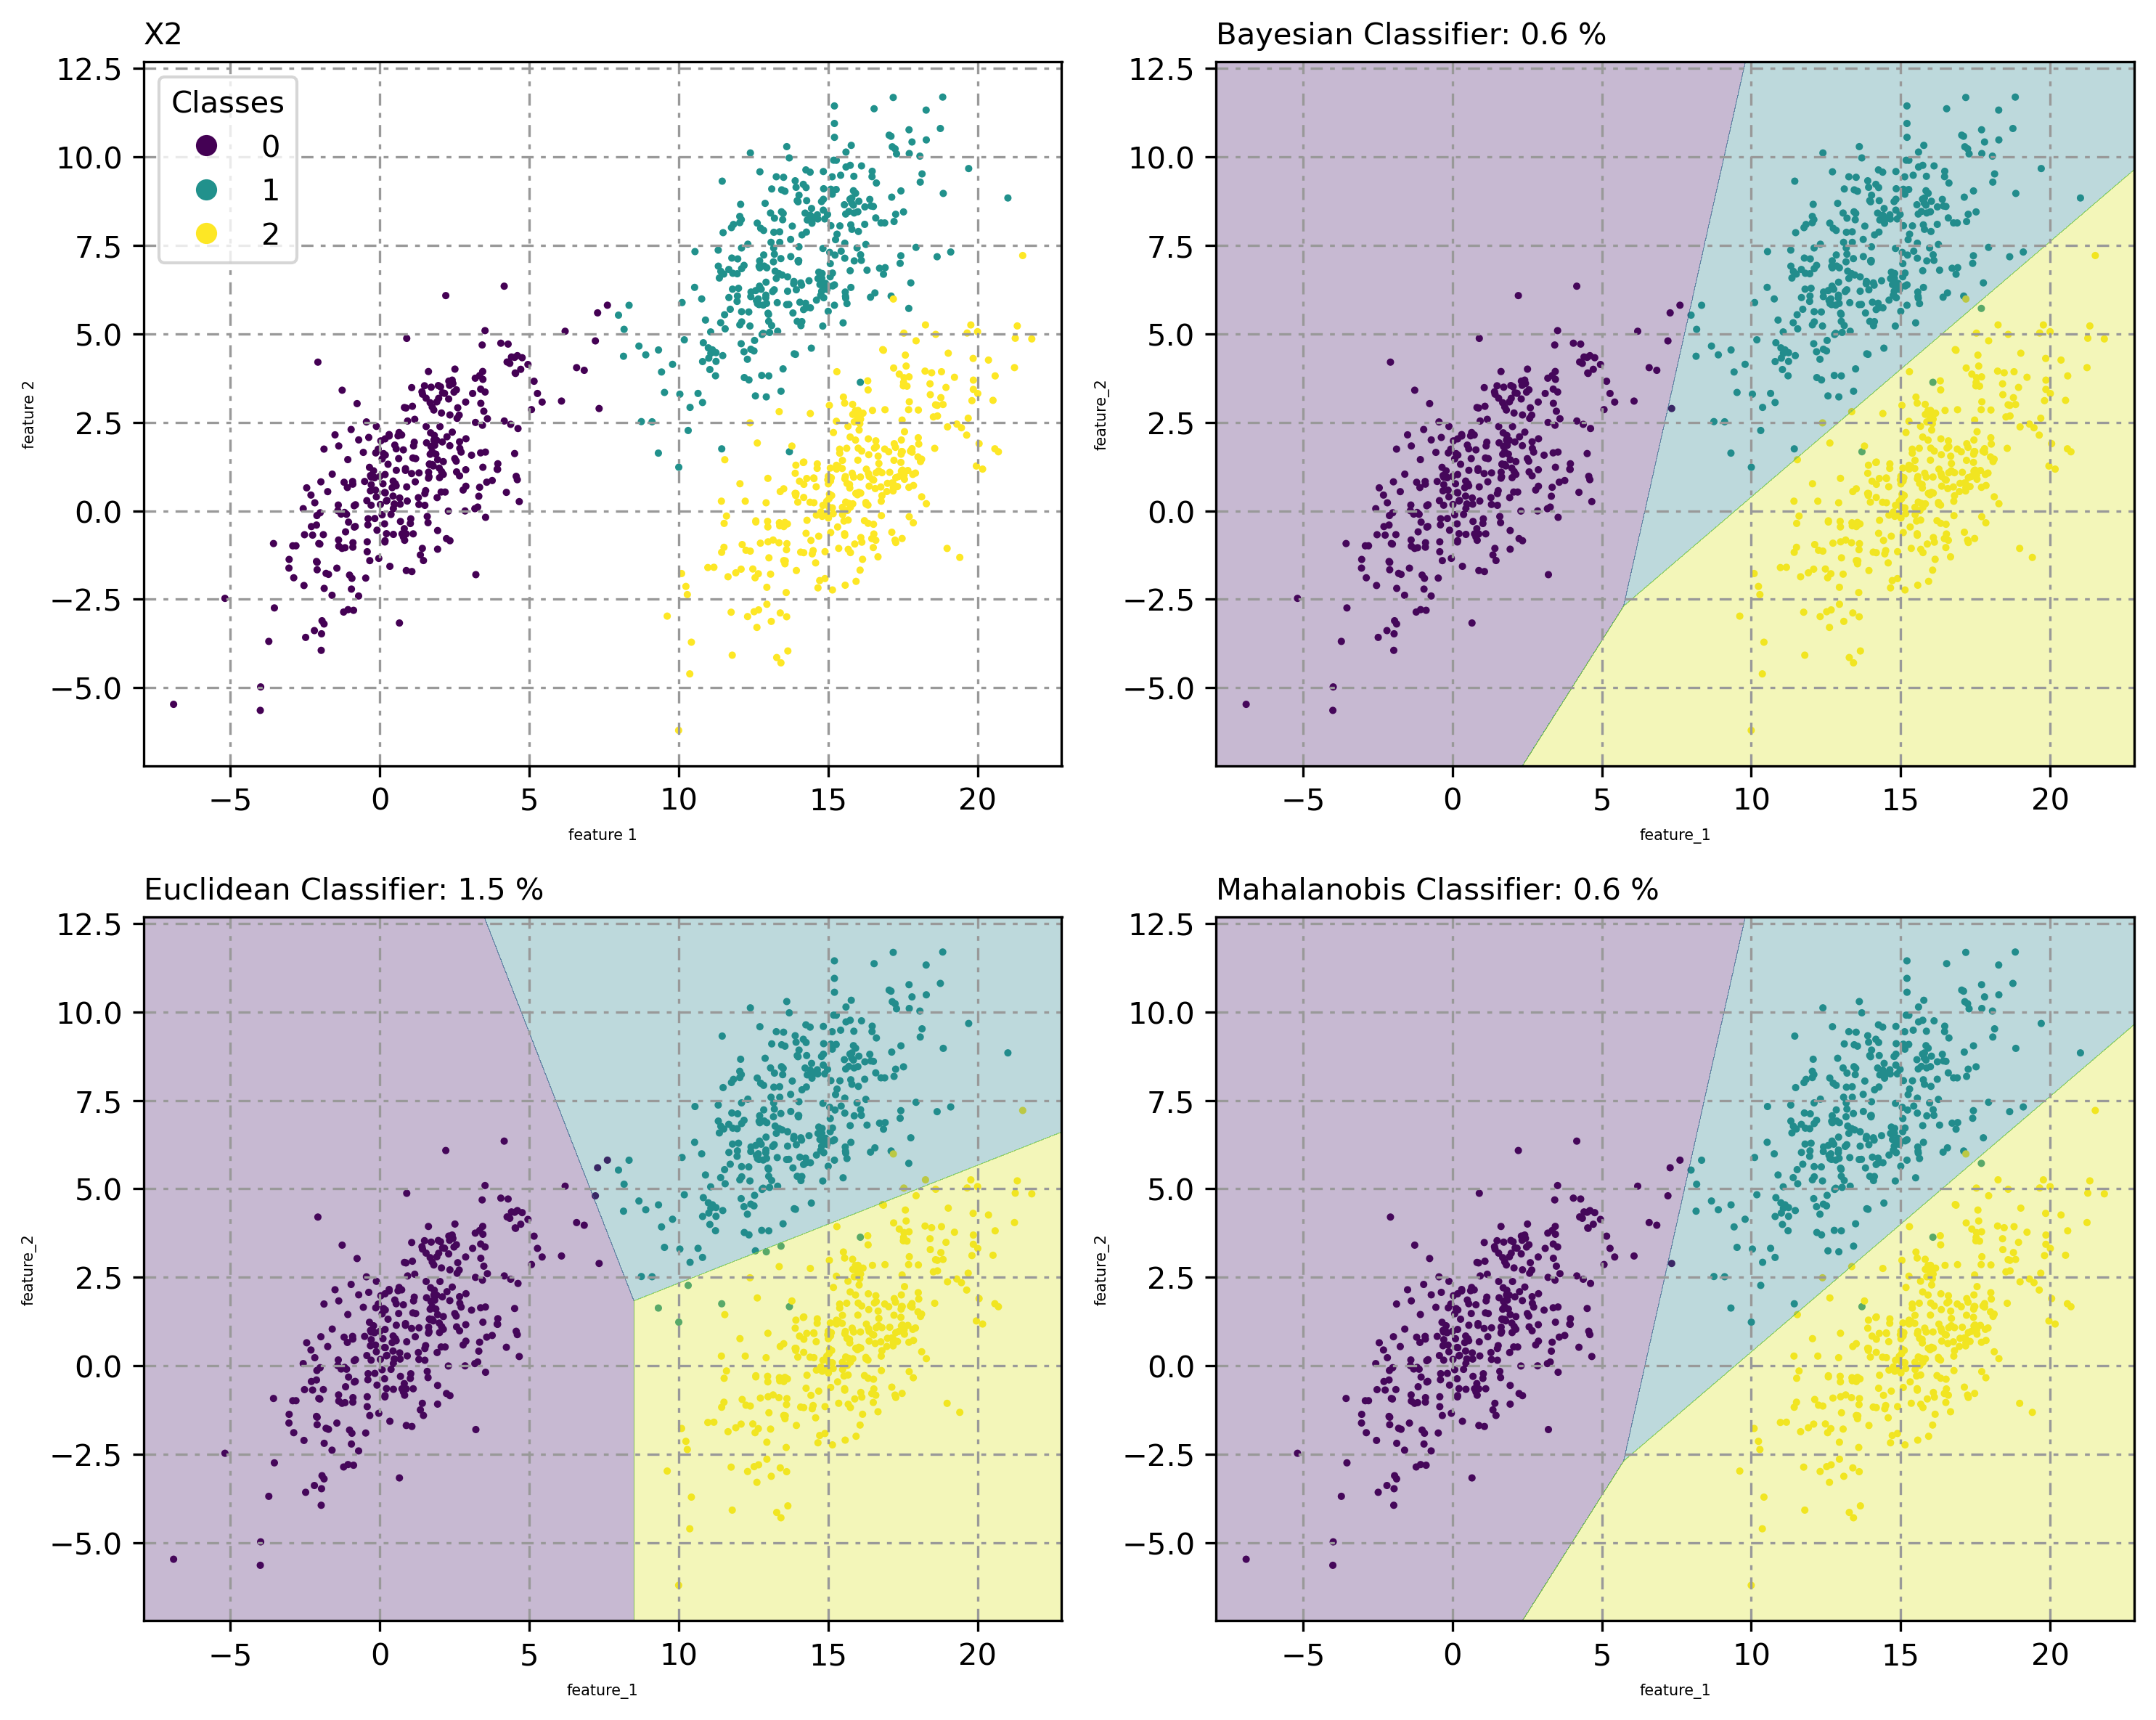

In [4]:
#parameters of dataset
#number of data point: N
#probability of each class: prior
N = 1000
prior = [1/3, 1/3, 1/3]
#means: m_i
m_0 = np.array([1, 1])
m_1 = np.array([14, 7])
m_2 = np.array([16, 1])
#covariances: s_i
s_0 = np.array([[5, 3], [3, 4]])
s_1 = np.array([[5, 3], [3, 4]])
s_2 = np.array([[5, 3], [3, 4]])
#keep them in a list
mu = [m_0, m_1, m_2]
sigma = [s_0, s_1, s_2]

#generating dataset
#number of samples in each class
class_count = [floor(N * prior[0]), floor(N * prior[1]), ceil(N * prior[2])]
#keep generated data of each class
x = []
for i in range(3):
    class_size = [class_count[i], 3]
    z = np.zeros(class_size)
    #setting label
    z[:, -1] = i
    #generating random data
    #from multi variate normal distribution
    #based on mean of i'th class
    #and covariance of i'th class
    z[:, :-1] = np.random.multivariate_normal(mu[i], sigma[i], size= class_size[0])
    x.append(z)
#concatenating all to one dataset
dataset = np.concatenate((x[0], x[1], x[2]), axis= 0)

#Error rate
#Bayesian error
prediction = bayesian_classifier(dataset[:, :-1], mu, sigma, prior)
error_bayesian = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)
#Euclidean error
prediction = euclidean_classifier(dataset[:, :-1], mu)
error_euclidean = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)
#Mahalanobis error
prediction = mahalanobis_classifier(dataset[:, :-1], mu, sigma[0])
error_mahalanobis = round((sum(prediction != dataset[:, -1]) / dataset.shape[0])* 100, 3)

#preparing mesh for showing boundries
#making mesh
x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_data = np.c_[xx.ravel(), yy.ravel()]
#applying classifiers on mesh grid
region_bayesian = bayesian_classifier(grid_data, mu, sigma, prior).reshape(xx.shape)
region_euclidean = euclidean_classifier(grid_data, mu).reshape(xx.shape)
region_mahalanobis = mahalanobis_classifier(grid_data, mu, sigma[0]).reshape(xx.shape)


#plotting
#plot structure
fig, ax = plt.subplots(2, 2, dpi= 300, figsize= (10, 8))

#original dataset
#data points
scatter = ax[0, 0].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
#details
ax[0, 0].set_xlim([x_min, x_max])
ax[0, 0].set_ylim([y_min, y_max])
ax[0, 0].set_title('X2', fontsize= 10, loc= 'left')
ax[0, 0].set_xlabel('feature 1', fontsize= 5)
ax[0, 0].set_ylabel('feature 2', fontsize= 5)
ax[0, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax[0, 0].legend(*scatter.legend_elements(), loc="best", title="Classes")

#Bayesian classifier
#data points and boundries
ax[0, 1].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[0, 1].contourf(xx, yy, region_bayesian, alpha=0.3)
#details
ax[0, 1].set_xlim([x_min, x_max])
ax[0, 1].set_ylim([y_min, y_max])
ax[0, 1].set_title(f'Bayesian Classifier: {error_bayesian} %', fontsize= 10, loc= 'left')
ax[0, 1].set_xlabel('feature_1', fontsize= 5)
ax[0, 1].set_ylabel('feature_2', fontsize= 5)
ax[0, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))

#Euclidean classifier
#data points and boundries
ax[1, 0].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[1, 0].contourf(xx, yy, region_euclidean, alpha=0.3)
#details
ax[1, 0].set_xlim([x_min, x_max])
ax[1, 0].set_ylim([y_min, y_max])
ax[1, 0].set_title(f'Euclidean Classifier: {error_euclidean} %', fontsize= 10, loc= 'left')
ax[1, 0].set_xlabel('feature_1', fontsize= 5)
ax[1, 0].set_ylabel('feature_2', fontsize= 5)
ax[1, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))

#Mahalanobis classifier
#data points and boundries
ax[1, 1].scatter(dataset[:, 0], dataset[:, 1], c= dataset[:, 2], s= 2)
ax[1, 1].contourf(xx, yy, region_mahalanobis, alpha=0.3)
#details
ax[1, 1].set_xlim([x_min, x_max])
ax[1, 1].set_ylim([y_min, y_max])
ax[1, 1].set_title(f'Mahalanobis Classifier: {error_mahalanobis} %', fontsize= 10, loc= 'left')
ax[1, 1].set_xlabel('feature_1', fontsize= 5)
ax[1, 1].set_ylabel('feature_2', fontsize= 5)
ax[1, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
plt.tight_layout()

## Q 2.7

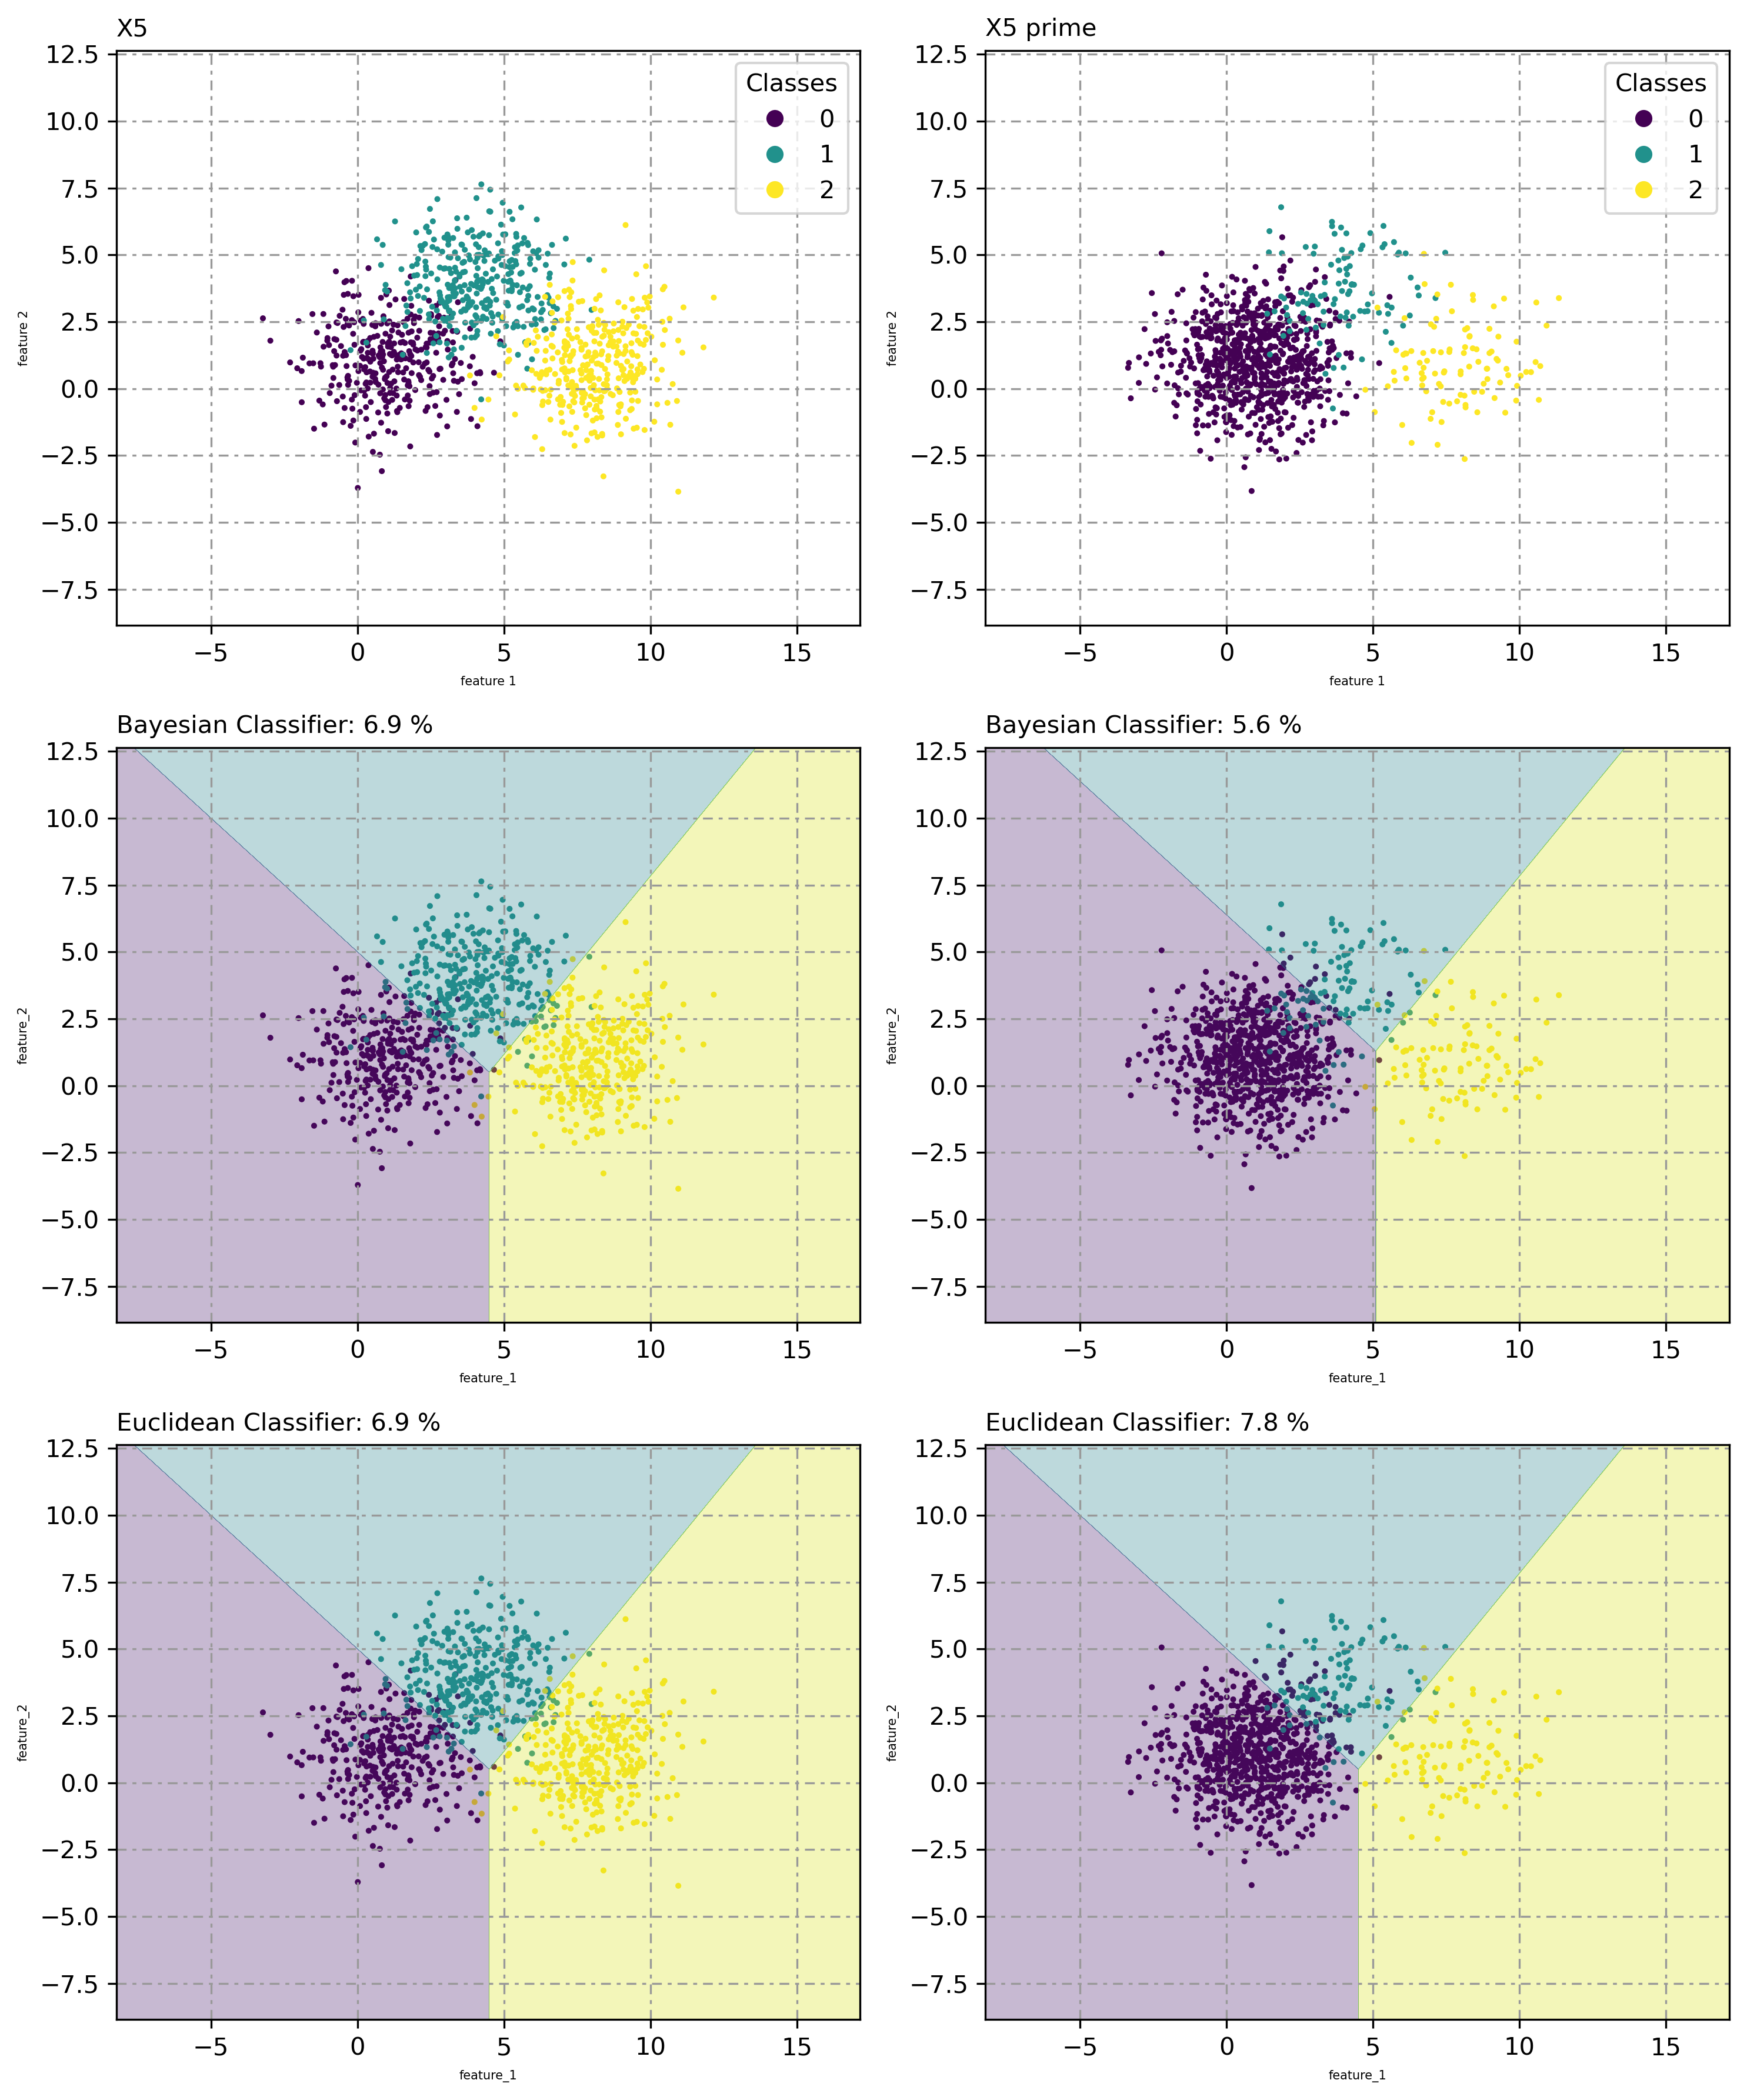

In [5]:
#parameters of dataset
#number of data point: N
#probability of each class: prior
N = 1000
prior_1 = [1/3, 1/3, 1/3]
prior_2 = [0.8, 0.1, 0.1]
#means: m_i
m_0 = np.array([1, 1])
m_1 = np.array([4, 4])
m_2 = np.array([8, 1])
#covariances: s_i
s_0 = np.array([[2, 0], [0, 2]])
s_1 = np.array([[2, 0], [0, 2]])
s_2 = np.array([[2, 0], [0, 2]])
#keep them in a list
mu = [m_0, m_1, m_2]
sigma = [s_0, s_1, s_2]

#generating dataset
#number of samples in each class
class_count_1 = [floor(N * prior_1[0]), floor(N * prior_1[1]), ceil(N * prior_1[2])]
class_count_2 = [floor(N * prior_2[0]), floor(N * prior_2[1]), ceil(N * prior_2[2])]
#keep generated data of each class
x_1 = []
x_2 = []
for i in range(3):
    class_size = [class_count_1[i], 3]
    z = np.zeros(class_size)
    #setting label
    z[:, -1] = i
    #generating random data
    #from multi variate normal distribution
    #based on mean of i'th class
    #and covariance of i'th class
    z[:, :-1] = np.random.multivariate_normal(mu[i], sigma[i], size= class_size[0])
    x_1.append(z)
    
    class_size = [class_count_2[i], 3]
    z = np.zeros(class_size)
    #setting label
    z[:, -1] = i
    #generating random data
    #from multi variate normal distribution
    #based on mean of i'th class
    #and covariance of i'th class
    z[:, :-1] = np.random.multivariate_normal(mu[i], sigma[i], size= class_size[0])
    x_2.append(z)
#concatenating all to one dataset
dataset_1 = np.concatenate((x_1[0], x_1[1], x_1[2]), axis= 0)
dataset_2 = np.concatenate((x_2[0], x_2[1], x_2[2]), axis= 0)

#Error rate
#Bayesian error
prediction_1 = bayesian_classifier(dataset_1[:, :-1], mu, sigma, prior_1)
prediction_2 = bayesian_classifier(dataset_2[:, :-1], mu, sigma, prior_2)
error_1_bayesian = round((sum(prediction_1 != dataset_1[:, -1]) / dataset_1.shape[0])* 100, 3)
error_2_bayesian = round((sum(prediction_2 != dataset_2[:, -1]) / dataset_2.shape[0])* 100, 3)
#Euclidean error
prediction_1 = euclidean_classifier(dataset_1[:, :-1], mu)
prediction_2 = euclidean_classifier(dataset_2[:, :-1], mu)
error_1_euclidean = round((sum(prediction_1 != dataset_1[:, -1]) / dataset_1.shape[0])* 100, 3)
error_2_euclidean = round((sum(prediction_2 != dataset_2[:, -1]) / dataset_2.shape[0])* 100, 3)

#preparing mesh for showing boundries
#making mesh
x_min, x_max = dataset_1[:, 0].min() - 5, dataset_1[:, 0].max() + 5
y_min, y_max = dataset_1[:, 1].min() - 5, dataset_1[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_data = np.c_[xx.ravel(), yy.ravel()]
#applying classifiers on mesh grid
region_1_bayesian = bayesian_classifier(grid_data, mu, sigma, prior_1).reshape(xx.shape)
region_2_bayesian = bayesian_classifier(grid_data, mu, sigma, prior_2).reshape(xx.shape)
region_1_euclidean = euclidean_classifier(grid_data, mu).reshape(xx.shape)
region_2_euclidean = euclidean_classifier(grid_data, mu).reshape(xx.shape)


#plotting
#plot structure
fig, ax = plt.subplots(3, 2, dpi= 300, figsize= (10, 12))

#original dataset
#data points
scatter_1 = ax[0, 0].scatter(dataset_1[:, 0], dataset_1[:, 1], c= dataset_1[:, 2], s= 2)
scatter_2 = ax[0, 1].scatter(dataset_2[:, 0], dataset_2[:, 1], c= dataset_2[:, 2], s= 2)
#details
ax[0, 0].set_xlim([x_min, x_max])
ax[0, 0].set_ylim([y_min, y_max])
ax[0, 1].set_xlim([x_min, x_max])
ax[0, 1].set_ylim([y_min, y_max])
ax[0, 0].set_title('X5', fontsize= 10, loc= 'left')
ax[0, 1].set_title('X5 prime', fontsize= 10, loc= 'left')
ax[0, 0].set_xlabel('feature 1', fontsize= 5)
ax[0, 1].set_xlabel('feature 1', fontsize= 5)
ax[0, 0].set_ylabel('feature 2', fontsize= 5)
ax[0, 1].set_ylabel('feature 2', fontsize= 5)
ax[0, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[0, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[0, 0].legend(*scatter_1.legend_elements(), loc="best", title="Classes")
ax[0, 1].legend(*scatter_2.legend_elements(), loc="best", title="Classes")

#Bayesian classifier
#data points and boundries
ax[1, 0].scatter(dataset_1[:, 0], dataset_1[:, 1], c= dataset_1[:, 2], s= 2)
ax[1, 1].scatter(dataset_2[:, 0], dataset_2[:, 1], c= dataset_2[:, 2], s= 2)
ax[1, 0].contourf(xx, yy, region_1_bayesian, alpha=0.3)
ax[1, 1].contourf(xx, yy, region_2_bayesian, alpha=0.3)
#details
ax[1, 0].set_xlim([x_min, x_max])
ax[1, 0].set_ylim([y_min, y_max])
ax[1, 1].set_xlim([x_min, x_max])
ax[1, 1].set_ylim([y_min, y_max])
ax[1, 0].set_title(f'Bayesian Classifier: {error_1_bayesian} %', fontsize= 10, loc= 'left')
ax[1, 1].set_title(f'Bayesian Classifier: {error_2_bayesian} %', fontsize= 10, loc= 'left')
ax[1, 0].set_xlabel('feature_1', fontsize= 5)
ax[1, 1].set_xlabel('feature_1', fontsize= 5)
ax[1, 0].set_ylabel('feature_2', fontsize= 5)
ax[1, 1].set_ylabel('feature_2', fontsize= 5)
ax[1, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))

#Euclidean classifier
#data points and boundries
ax[2, 0].scatter(dataset_1[:, 0], dataset_1[:, 1], c= dataset_1[:, 2], s= 2)
ax[2, 1].scatter(dataset_2[:, 0], dataset_2[:, 1], c= dataset_2[:, 2], s= 2)
ax[2, 0].contourf(xx, yy, region_1_euclidean, alpha=0.3)
ax[2, 1].contourf(xx, yy, region_2_euclidean, alpha=0.3)
#details
ax[2, 0].set_xlim([x_min, x_max])
ax[2, 0].set_ylim([y_min, y_max])
ax[2, 1].set_xlim([x_min, x_max])
ax[2, 1].set_ylim([y_min, y_max])
ax[2, 0].set_title(f'Euclidean Classifier: {error_1_euclidean} %', fontsize= 10, loc= 'left')
ax[2, 1].set_title(f'Euclidean Classifier: {error_2_euclidean} %', fontsize= 10, loc= 'left')
ax[2, 0].set_xlabel('feature_1', fontsize= 5)
ax[2, 1].set_xlabel('feature_1', fontsize= 5)
ax[2, 0].set_ylabel('feature_2', fontsize= 5)
ax[2, 1].set_ylabel('feature_2', fontsize= 5)
ax[2, 0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[2, 1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
plt.tight_layout()

## Conclusion
When prior probabilities are equal, there is no difference between Euclidean classifier and Bayesian classifier for equal-diagnoal covariance matrices. But when priors are not the same, Bayesian classifier perform better than Euclidean classifier. In Bayesian classifier, classes with more probability have more effect on decision regions.

Euclidean classifier are based on assumption that priors are equal (actually there is no pre-assumption about classes) and diagonal-equal matrix of covariance for all classes. Mahalanobis classifier is the same as Euclidean classifier exept that it allows for matrix of covariance to be non diagonal. Bayesian classifier is the best classifier for general case (when priors are not the same and each class has its own covariance matrix). Error of Bayesian classifier is the best that we can get and its usually a benchmark report for other classifiers.